In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
housing = pd.DataFrame(pd.read_csv('./Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [70]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Random seed to randomize the dataset.
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [71]:
df_test.shape

(109, 13)

In [72]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_threeAtrain = df_train[num_vars]
df_threeAtest = df_test[num_vars]
df_threeAtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [73]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_threeAtrain[num_vars] = scaler.fit_transform(df_threeAtrain[num_vars])
df_threeAtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,0.124199,0.2,0.0,0.0,0.0,0.000000
496,0.150654,0.2,0.0,0.0,0.0,0.081818
484,0.083821,0.2,0.0,0.0,0.0,0.096970
507,0.122807,0.2,0.0,0.0,0.0,0.072727
252,0.558619,0.4,0.0,0.0,0.0,0.239394


In [74]:
dataset_train = df_threeAtrain.values[:,:]
print(dataset_train[:20,:])

[[0.12419939 0.2        0.         0.         0.         0.        ]
 [0.15065441 0.2        0.         0.         0.         0.08181818]
 [0.08382066 0.2        0.         0.         0.         0.0969697 ]
 [0.12280702 0.2        0.         0.         0.         0.07272727]
 [0.55861877 0.4        0.         0.         0.         0.23939394]
 [0.14842662 0.4        0.         0.33333333 0.         0.23030303]
 [0.13951546 0.4        0.         0.33333333 0.33333333 0.24545455]
 [0.55444166 0.6        0.5        0.33333333 0.66666667 0.3030303 ]
 [0.12559176 0.2        0.         0.         0.         0.15757576]
 [0.11723754 0.2        0.5        0.         0.         0.16363636]
 [0.79114453 0.4        0.         0.33333333 0.66666667 0.6969697 ]
 [0.06015038 0.2        0.         0.         0.         0.1030303 ]
 [0.17153996 1.         0.5        0.33333333 0.         0.37515152]
 [0.18546366 0.2        0.         0.         0.         0.13030303]
 [0.21992481 0.6        0.5       

In [75]:
X_train = df_threeAtrain.values[:,0:5]
Y_train = df_threeAtrain.values[:,5]
len(X_train), len(Y_train)

(436, 436)

In [76]:
print('X =', X_train[:5])
print('Y =', Y_train[:5])

X = [[0.12419939 0.2        0.         0.         0.        ]
 [0.15065441 0.2        0.         0.         0.        ]
 [0.08382066 0.2        0.         0.         0.        ]
 [0.12280702 0.2        0.         0.         0.        ]
 [0.55861877 0.4        0.         0.         0.        ]]
Y = [0.         0.08181818 0.0969697  0.07272727 0.23939394]


In [77]:
# Convert to 2D array (381x5)
m = len(X_train)
X_1 = X_train.reshape(m,5)
print("X_1 =", X_1[:5,:])

X_1 = [[0.12419939 0.2        0.         0.         0.        ]
 [0.15065441 0.2        0.         0.         0.        ]
 [0.08382066 0.2        0.         0.         0.        ]
 [0.12280702 0.2        0.         0.         0.        ]
 [0.55861877 0.4        0.         0.         0.        ]]


In [78]:
m = len(X_train)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [79]:
X_train = np.hstack((X_0, X_1))
X_train[:5]

array([[1.        , 0.12419939, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.15065441, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.08382066, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.12280702, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.55861877, 0.4       , 0.        , 0.        ,
        0.        ]])

In [80]:
theta = np.zeros((6,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [81]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m
lambda_value: Regularization parameter. 
theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss(X, Y, theta, lambda_value):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    regularization = lambda_value * np.sum(np.square(theta))
    J = (1 / (2 * m)) * (np.sum(sqrErrors) + regularization)
    return J

In [82]:
lambda_value = 10
cost = compute_loss(X_train, Y_train, theta, lambda_value)
print("Cost loss for all given theta =", cost)

Cost loss for all given theta = 20.934727519081726


In [83]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.
lambda_value: Regularization parameter. 

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent(X, Y, theta, alpha, iterations, lambda_value):
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss(X, Y, theta, lambda_value)
    return theta, loss_history

In [84]:
theta = [0., 0., 0., 0., 0., 0.]
lambda_value = 10
iterations = 1500
alpha = 0.003

In [85]:
theta, loss_history = gradient_descent(X_train, Y_train, theta, alpha, iterations, lambda_value)
print("Final value of theta =", theta)
print("loss_history =", loss_history)

Final value of theta = [0.15859029 0.08182965 0.08651773 0.0835067  0.09310226 0.08501595]
loss_history = [0.0477018  0.04739078 0.04708233 ... 0.00924481 0.00924412 0.00924343]


In [86]:
df_threeAtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,4000,3,1,2,1,4585000
113,9620,3,1,1,2,6083000
325,3460,4,1,2,0,4007500
66,13200,2,1,1,1,6930000
479,3660,4,1,2,0,2940000


In [87]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_threeAtest[num_vars] = scaler.fit_transform(df_threeAtest[num_vars])
df_threeAtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,0.203463,0.50,0.0,0.333333,0.333333,0.270000
113,0.690043,0.50,0.0,0.000000,0.666667,0.412667
325,0.156710,0.75,0.0,0.333333,0.000000,0.215000
66,1.000000,0.25,0.0,0.000000,0.333333,0.493333
479,0.174026,0.75,0.0,0.333333,0.000000,0.113333


In [88]:
dataset_test = df_threeAtest.values[:,:]
print(dataset_test[:20,:])

[[0.2034632  0.5        0.         0.33333333 0.33333333 0.27      ]
 [0.69004329 0.5        0.         0.         0.66666667 0.41266667]
 [0.15670996 0.75       0.         0.33333333 0.         0.215     ]
 [1.         0.25       0.         0.         0.33333333 0.49333333]
 [0.17402597 0.75       0.         0.33333333 0.         0.11333333]
 [0.40692641 0.5        0.33333333 0.66666667 0.         0.42333333]
 [0.19047619 0.5        0.         0.         0.66666667 0.17      ]
 [0.15844156 0.5        0.         0.33333333 0.33333333 0.11333333]
 [0.16121212 0.25       0.         0.         0.33333333 0.16666667]
 [0.63636364 0.75       0.33333333 1.         0.66666667 0.59333333]
 [0.37662338 0.75       0.33333333 1.         0.         0.47666667]
 [0.2        0.5        0.         0.33333333 0.         0.21333333]
 [0.15584416 0.5        0.         0.33333333 0.         0.13333333]
 [0.38181818 0.5        0.         0.         0.         0.14666667]
 [0.37532468 0.5        0.        

In [89]:
X_test = df_threeAtest.values[:,0:5]
Y_test = df_threeAtest.values[:,5]
len(X_test), len(Y_test)

(109, 109)

In [90]:
print('X =', X_test[:5])
print('Y =', Y_test[:5])

X = [[0.2034632  0.5        0.         0.33333333 0.33333333]
 [0.69004329 0.5        0.         0.         0.66666667]
 [0.15670996 0.75       0.         0.33333333 0.        ]
 [1.         0.25       0.         0.         0.33333333]
 [0.17402597 0.75       0.         0.33333333 0.        ]]
Y = [0.27       0.41266667 0.215      0.49333333 0.11333333]


In [91]:
# Convert to 2D array (164x5)
m = len(X_test)
X_1 = X_test.reshape(m,5)
print("X_1 =", X_1[:5,:])

X_1 = [[0.2034632  0.5        0.         0.33333333 0.33333333]
 [0.69004329 0.5        0.         0.         0.66666667]
 [0.15670996 0.75       0.         0.33333333 0.        ]
 [1.         0.25       0.         0.         0.33333333]
 [0.17402597 0.75       0.         0.33333333 0.        ]]


In [92]:
# Create theta zero.
m = len(X_test)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 109)

In [93]:
X_test = np.hstack((X_0, X_1))
X_test[:5]

array([[1.        , 0.2034632 , 0.5       , 0.        , 0.33333333,
        0.33333333],
       [1.        , 0.69004329, 0.5       , 0.        , 0.        ,
        0.66666667],
       [1.        , 0.15670996, 0.75      , 0.        , 0.33333333,
        0.        ],
       [1.        , 1.        , 0.25      , 0.        , 0.        ,
        0.33333333],
       [1.        , 0.17402597, 0.75      , 0.        , 0.33333333,
        0.        ]])

In [94]:
theta_test = np.zeros((6,1))
theta_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [95]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m

theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss_noreg(X, Y, theta):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [96]:
cost_test = compute_loss_noreg(X_test, Y_test, theta_test)
print("Cost loss for all given theta =", cost_test)

Cost loss for all given theta = 5.79399238888889


In [97]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent_noreg(X, Y, theta, alpha, iterations):
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss_noreg(X, Y, theta)
    return theta, loss_history

In [98]:
theta_test = [0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.003

In [99]:
theta_test, loss_history_test = gradient_descent_noreg(X_test, Y_test, theta_test, alpha, iterations)
print("Final value of theta =", theta_test)
print("loss_history =", loss_history_test)

Final value of theta = [0.161425   0.10594748 0.09248631 0.07041321 0.09856776 0.08675523]
loss_history = [0.05276804 0.0523836  0.05200255 ... 0.00748962 0.00748864 0.00748766]


Text(0.5, 1.0, 'Convergence of gradient descent')

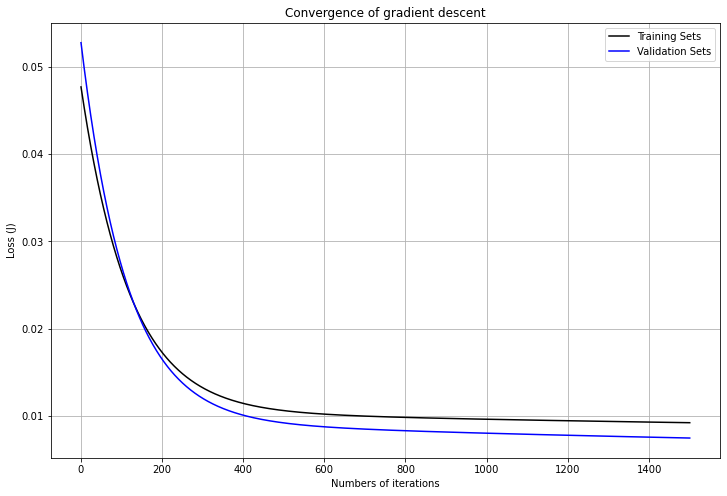

In [100]:
plt.plot(range(1, iterations + 1), loss_history, color = 'black')
plt.plot(range(1, iterations + 1), loss_history_test, color = 'blue')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.legend(['Training Sets', 'Validation Sets'])
plt.xlabel("Numbers of iterations")
plt.ylabel("Loss (J)")
plt.title("Convergence of gradient descent")